### Phase 2 - EDA
----
DS5220 Supervised Machine Learning  
Fall 2024   
Instructor: Steve Morin PhD  
Nelson Farrell and Michael Massone    

-----
#### III. Explore the Data
1. Create a copy of the data for exploration.
2. Create a dedicated Jupyter notebook to keep a record of your data exploration.
3. Identify the target attribute.
4. Study each attribute and its characteristics.
    - The goal here is to prepare for setting the attribute configuration for machine learning.
    - We are looking for each attribute's role in supervised machine learning. 
    - Possible roles are:  
        • attributes with missingness above threshold  
        • non machine learning attributes  
        • attributes to exclude from machine learning      
5. Visualizations as needed.
6. Study the correlations and associations between attributes and between attributes and target.
    - This might inform your attribute configuration.
7. Study how you would solve the problem manually.
8. Identify additional data that would be useful (go back to “Get the Data”).
    - You are not required to get the additional data.
    - You should give this some thought and document what data might add to your project.

## Packages

In [1]:
# Libraries
import os
import sys
from time import time
from pathlib import Path
from nbconvert import HTMLExporter
import nbformat

import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy.stats import zscore

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
# Script runtime
start = time()

## Pathing

In [3]:
# Set Working Dir
path = Path.cwd()
path_to_project_directory = path.parent
sys.path.insert(1, str(path_to_project_directory))
print(f"The working directory has been set to: {str(path_to_project_directory)}")


The working directory has been set to: /Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Code/roux_class_files/DS5220/final_project/customer-segmentation


## Modules

In [4]:
# Modules
#from modules.phase1_utils import * 
from modules.eda_utils import *


### Parameters

In [5]:
# Params

train_path = "data/data_splits/train_df.csv"
target = "Segmentation"
random_state = 18
nominal_imputer_strategy = "most_frequent"


## Import Data

In [6]:
# Import data
train_df = pd.read_csv(str( path_to_project_directory /train_path))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            6454 non-null   int64  
 1   ID               6454 non-null   int64  
 2   Gender           6454 non-null   object 
 3   Ever_Married     6343 non-null   object 
 4   Age              6454 non-null   int64  
 5   Graduated        6395 non-null   object 
 6   Profession       6348 non-null   object 
 7   Work_Experience  5808 non-null   float64
 8   Spending_Score   6454 non-null   object 
 9   Family_Size      6190 non-null   float64
 10  Var_1            6394 non-null   object 
 11  Segmentation     6454 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 605.2+ KB


### Examine Data Shape

In [7]:
num_rows_train_df_pre = train_df.shape[0]
print(f"The shape of train set PRE to dropping rows where the target missing: {train_df.shape}")
train_df = train_df.dropna(subset = target)
num_rows_train_df_post = train_df.shape[0]
print(f"The shape of train set POST to dropping rows where the target missing: {train_df.shape}")
print(f"Number of rows dropped: {num_rows_train_df_pre - num_rows_train_df_post}")

The shape of train set PRE to dropping rows where the target missing: (6454, 12)
The shape of train set POST to dropping rows where the target missing: (6454, 12)
Number of rows dropped: 0


## Examinne Column Types and NaN Ratios

In [8]:
col_info_dict = check_column_types_and_nans(train_df)

**************************************************
Numerical Columns:
index 
 - dtype: int64 
 - NaN count: 0 
 - NaN ratio: 0.0
ID 
 - dtype: int64 
 - NaN count: 0 
 - NaN ratio: 0.0
Age 
 - dtype: int64 
 - NaN count: 0 
 - NaN ratio: 0.0
Work_Experience 
 - dtype: float64 
 - NaN count: 646 
 - NaN ratio: 0.10009296560272699
Family_Size 
 - dtype: float64 
 - NaN count: 264 
 - NaN ratio: 0.040904865199876045
**************************************************
Non-Numerical Columns:
Gender 
 - dtype: object 
 - NaN count: 0 
 - NaN ratio: 0.0
Ever_Married 
 - dtype: object 
 - NaN count: 111 
 - NaN ratio: 0.017198636504493336
Graduated 
 - dtype: object 
 - NaN count: 59 
 - NaN ratio: 0.00914161760148745
Profession 
 - dtype: object 
 - NaN count: 106 
 - NaN ratio: 0.01642392314843508
Spending_Score 
 - dtype: object 
 - NaN count: 0 
 - NaN ratio: 0.0
Var_1 
 - dtype: object 
 - NaN count: 60 
 - NaN ratio: 0.009296560272699102
Segmentation 
 - dtype: object 
 - NaN count: 0 
 -

In [9]:
# Check dict contents
col_info_dict

{'numerical_cols': ['index', 'ID', 'Age', 'Work_Experience', 'Family_Size'],
 'nominal_cols': ['Gender',
  'Ever_Married',
  'Graduated',
  'Profession',
  'Spending_Score',
  'Var_1',
  'Segmentation'],
 'nan_above_threshold': []}

## Plot Missingness

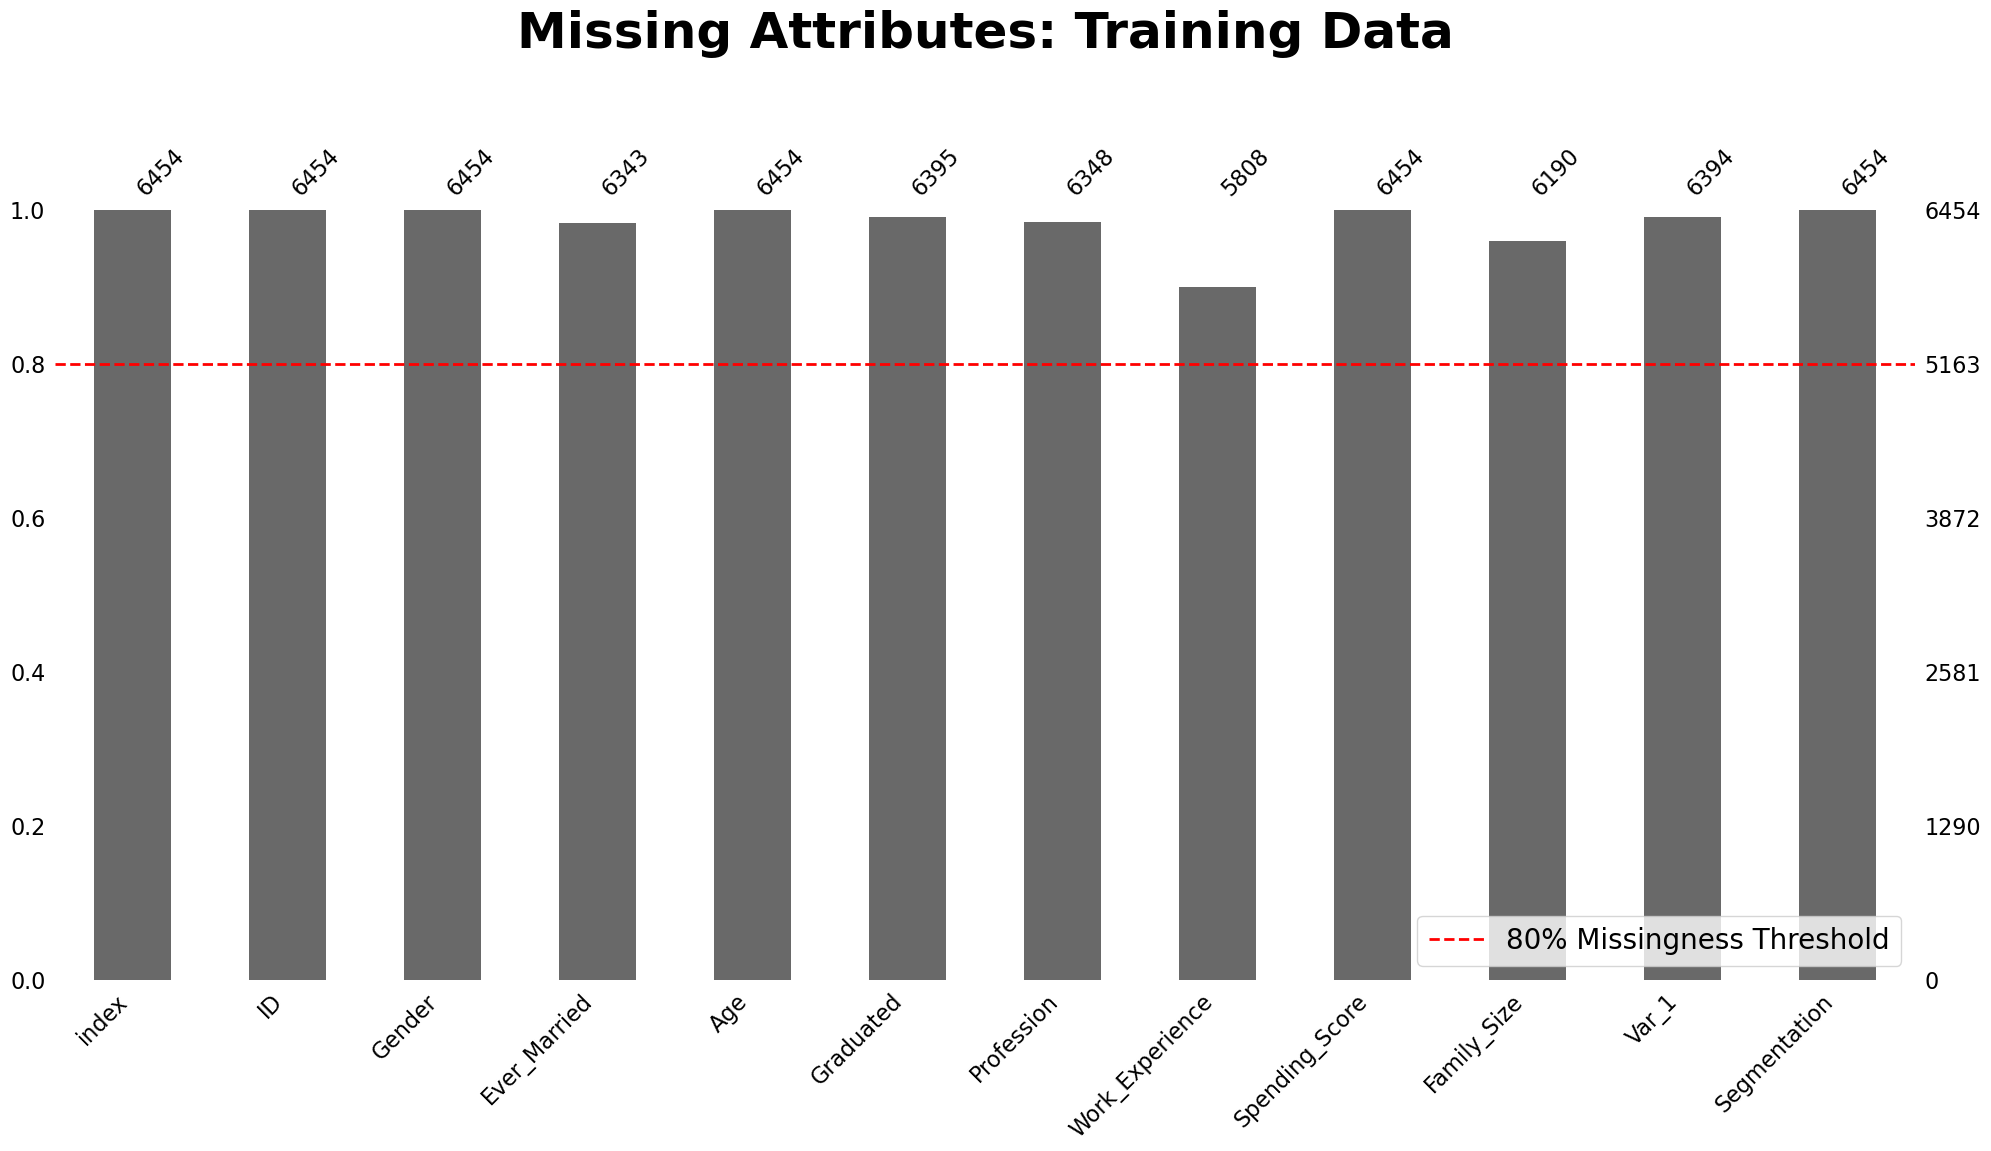

In [10]:
msno.bar(train_df)
plt.title("Missing Attributes: Training Data", fontsize = 36, weight = 'bold', y = 1.2)
plt.axhline(y=0.8, color='red', linestyle='--', linewidth=2, label="80% Missingness Threshold")
plt.legend(loc='lower right', fontsize=20)
plt.show()

In [11]:
ml_attr_dict = separate_unique_columns(train_df)

*****************************
non_ML_attr
index
ID
*****************************
ML_attr
Gender
Ever_Married
Age
Graduated
Profession
Work_Experience
Spending_Score
Family_Size
Var_1
Segmentation


In [12]:
# Check dict contents
ml_attr_dict

{'non_ML_attr': ['index', 'ID'],
 'ML_attr': ['Gender',
  'Ever_Married',
  'Age',
  'Graduated',
  'Profession',
  'Work_Experience',
  'Spending_Score',
  'Family_Size',
  'Var_1',
  'Segmentation']}

### Group Nominal Attributes

In [13]:
# seperate nominal machine learning attributes
nominal_df = train_df[[col for col in col_info_dict['nominal_cols'] if col not in ml_attr_dict['non_ML_attr']]].copy()
nominal_attr = nominal_df.columns.to_list()
print(f"Nominal Features: {nominal_attr}")
nominal_df



Nominal Features: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Female,No,Yes,Artist,Low,Cat_6,A
1,Male,Yes,Yes,Entertainment,Average,Cat_6,B
2,Female,No,Yes,Entertainment,Low,Cat_6,B
3,Female,Yes,Yes,Artist,Average,Cat_6,A
4,Female,Yes,No,Doctor,Low,Cat_7,A
...,...,...,...,...,...,...,...
6449,Female,No,No,Homemaker,Low,Cat_6,D
6450,Male,No,Yes,Healthcare,Low,Cat_6,D
6451,Female,No,No,Engineer,Low,Cat_4,D
6452,Male,No,No,Artist,Low,Cat_6,D


### Examine Cardinality of Nominal Columns

In [14]:
print("Cardinality of Nominal Features:")
print(nominal_df.nunique())

Cardinality of Nominal Features:
Gender            2
Ever_Married      2
Graduated         2
Profession        9
Spending_Score    3
Var_1             7
Segmentation      4
dtype: int64


### Group Numerical Attributes

In [15]:
# seperate numerical machine learning attributes
numerical_df = train_df[[col for col in col_info_dict['numerical_cols'] if col not in ml_attr_dict['non_ML_attr']]].copy()
numerical_attr = numerical_df.columns.to_list()
print(f"Numerical Features: {numerical_attr}")
numerical_df

Numerical Features: ['Age', 'Work_Experience', 'Family_Size']


,Age,Work_Experience,Family_Size
0,32,9.0,1.0
1,72,NaN,2.0
2,33,1.0,4.0
3,48,0.0,6.0
4,28,9.0,1.0
...,...,...,...
6449,27,8.0,1.0
6450,37,0.0,2.0
6451,27,6.0,6.0
6452,26,0.0,2.0


### Examine Statistics Numerical Columns

In [16]:
# Compute statistcs for numerical col
numerical_stats = numerical_df.describe()

print("Statistics of each column:")
print(numerical_stats)

Statistics of each column:
               Age  Work_Experience  Family_Size
count  6454.000000      5808.000000  6190.000000
mean     43.592036         2.671488     2.839742
std      16.672806         3.434175     1.531119
min      18.000000         0.000000     1.000000
25%      31.000000         0.000000     2.000000
50%      41.000000         1.000000     3.000000
75%      53.000000         4.000000     4.000000
max      89.000000        14.000000     9.000000


### Check Attributes Groupings

In [17]:
# Confirm all attributes are accounted for
assert (train_df.shape[1] == len(numerical_attr) + len(nominal_attr) + len(ml_attr_dict['non_ML_attr']))
print(f"All attributes in the train set have been accounted for.")
print()
if target:
    print(f"Target: {target} ({'Numerical' if target in numerical_attr else 'Nominal' if target in nominal_attr else 'N/A'})")
    print()
print("ML Ignore List:")
for idx, attr in enumerate(ml_attr_dict['non_ML_attr']):
    if attr != target:
        print(f"{idx + 1}. {attr}")
print()

print("Numerical Attributes:")
for idx, attr in enumerate(numerical_attr):
    if attr != target:
        print(f"{idx + 1}. {attr}")
print()

print("Nominal Attributes:")
for idx, attr in enumerate(nominal_attr):
    if attr != target:
        print(f"{idx + 1}. {attr}")
print()

print(f"Total Number of ML Attributes: {len(nominal_attr) + len(numerical_attr) - 1}")

All attributes in the train set have been accounted for.

Target: Segmentation (Nominal)

ML Ignore List:
1. index
2. ID

Numerical Attributes:
1. Age
2. Work_Experience
3. Family_Size

Nominal Attributes:
1. Gender
2. Ever_Married
3. Graduated
4. Profession
5. Spending_Score
6. Var_1

Total Number of ML Attributes: 9


## Nominal EDA


Contingency Table: Gender vs Segmentation


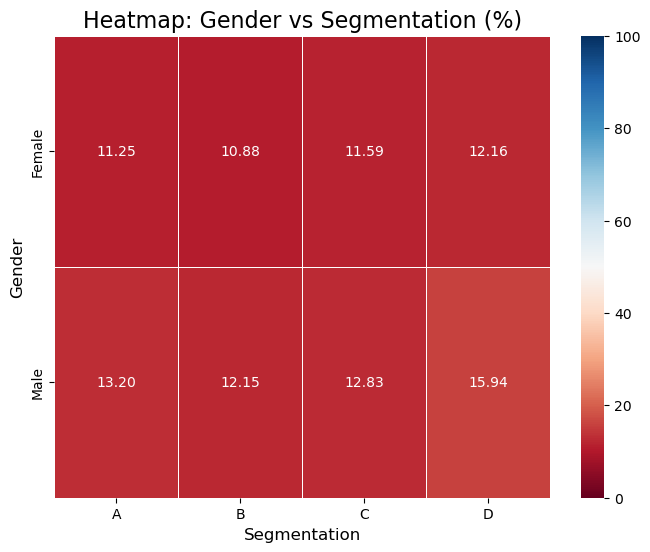

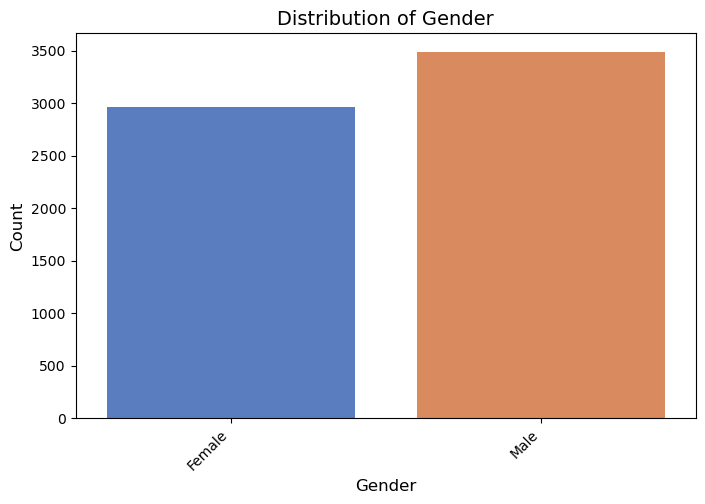


Frequency Distribution for Gender:
__________________________________________________
        Count  Frequency_Ratio (%)
Gender                            
Male     3493                 54.1
Female   2961                 45.9 


Contingency Table: Ever_Married vs Segmentation


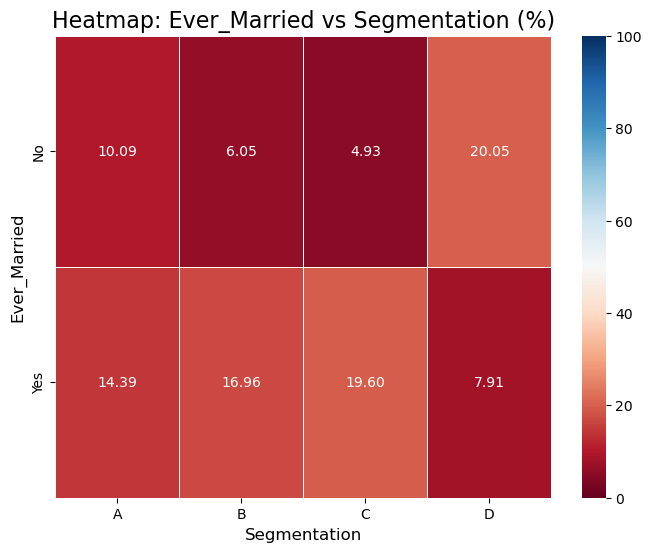

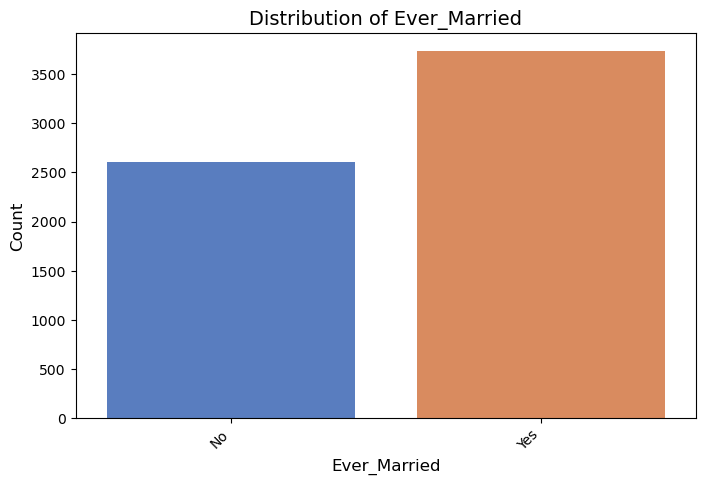


Frequency Distribution for Ever_Married:
__________________________________________________
              Count  Frequency_Ratio (%)
Ever_Married                            
Yes            3734                 58.9
No             2609                 41.1 


Contingency Table: Graduated vs Segmentation


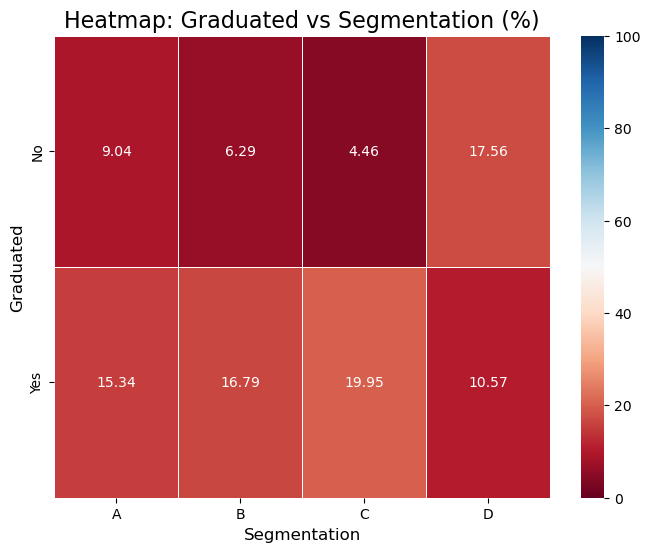

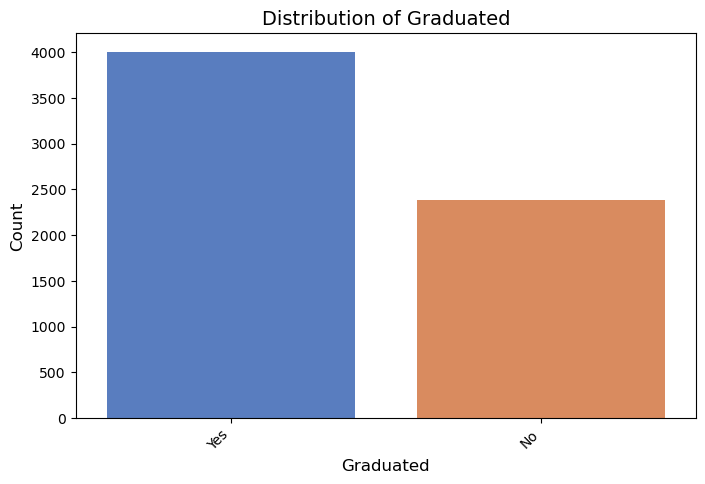


Frequency Distribution for Graduated:
__________________________________________________
           Count  Frequency_Ratio (%)
Graduated                            
Yes         4007                 62.7
No          2388                 37.3 


Contingency Table: Profession vs Segmentation


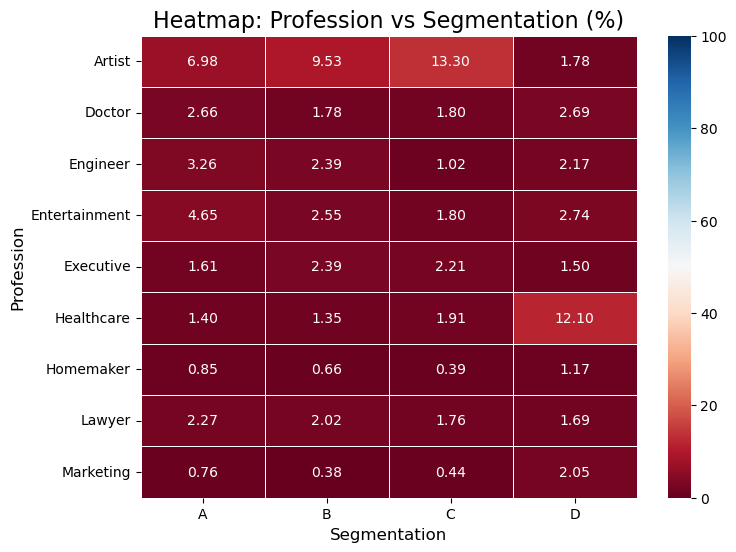

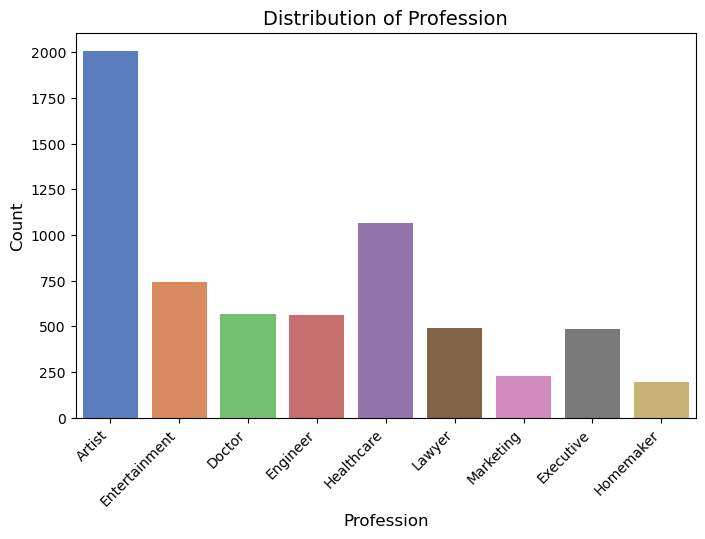


Frequency Distribution for Profession:
__________________________________________________
               Count  Frequency_Ratio (%)
Profession                               
Artist          2005                 31.6
Healthcare      1064                 16.8
Entertainment    745                 11.7
Doctor           567                  8.9
Engineer         562                  8.9
Lawyer           491                  7.7
Executive        489                  7.7
Marketing        230                  3.6
Homemaker        195                  3.1 


Contingency Table: Spending_Score vs Segmentation


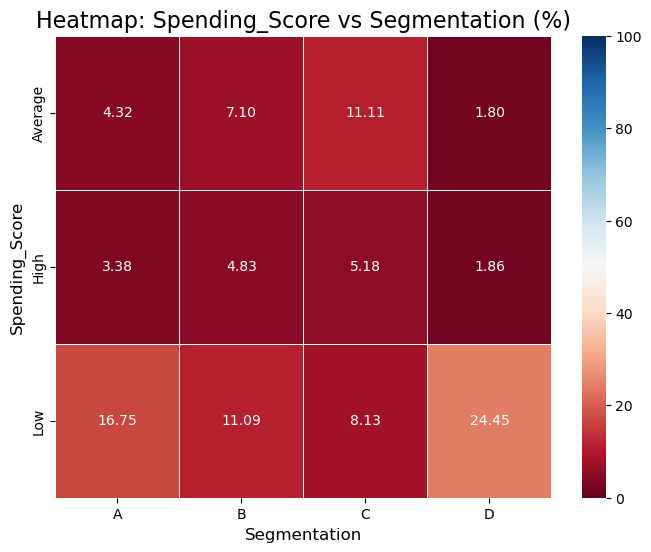

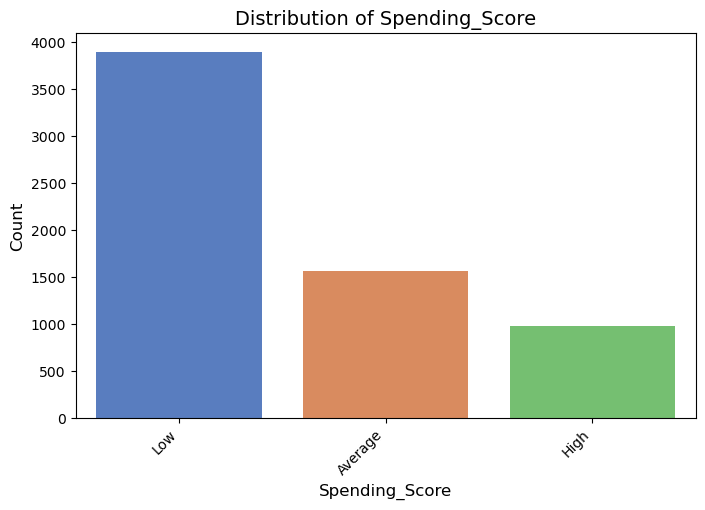


Frequency Distribution for Spending_Score:
__________________________________________________
                Count  Frequency_Ratio (%)
Spending_Score                            
Low              3900                 60.4
Average          1570                 24.3
High              984                 15.2 


Contingency Table: Var_1 vs Segmentation


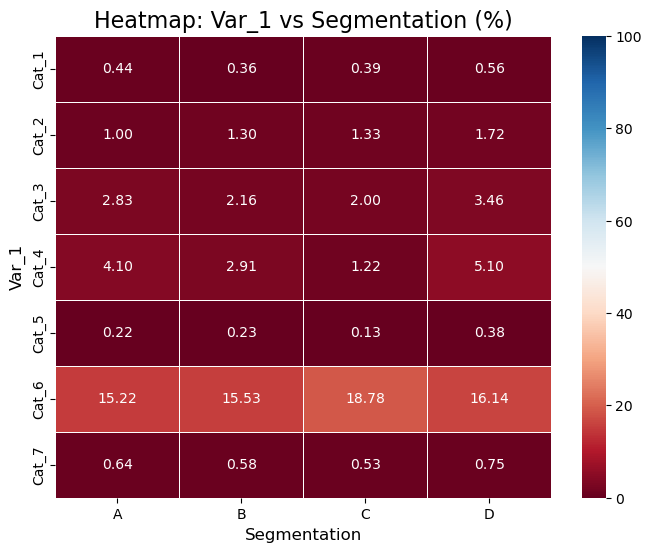

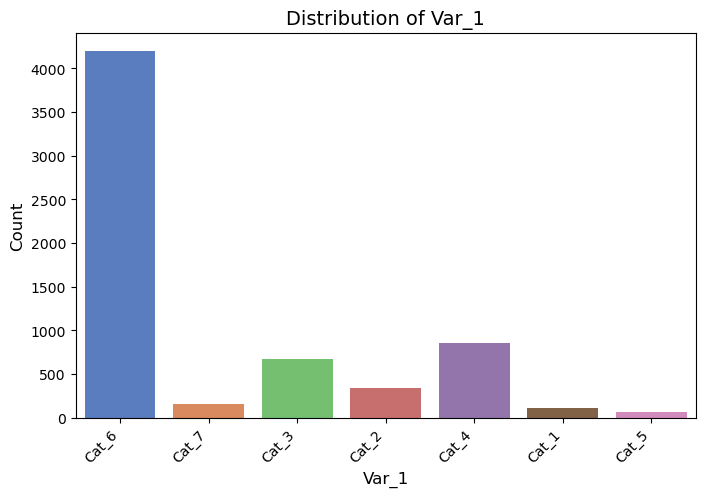


Frequency Distribution for Var_1:
__________________________________________________
       Count  Frequency_Ratio (%)
Var_1                            
Cat_6   4199                 65.7
Cat_4    852                 13.3
Cat_3    668                 10.4
Cat_2    342                  5.3
Cat_7    160                  2.5
Cat_1    112                  1.8
Cat_5     61                  1.0 

*************************** 
****** TARGET COLUMN ******
 ***************************


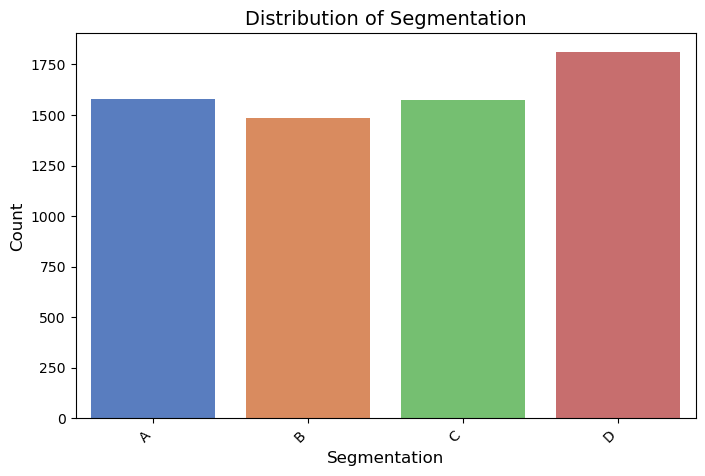


Frequency Distribution for Segmentation:
__________________________________________________
              Count  Frequency_Ratio (%)
Segmentation                            
D              1814                 28.1
A              1578                 24.4
C              1576                 24.4
B              1486                 23.0 



In [18]:
# nominal EDA
nominal_eda(nominal_df, target)
    

## Numerical EDA

____________________________________________________________________________________________________
Attribute: Age
____________________________________________________________________________________________________
count    6454.000000
mean       43.592036
std        16.672806
min        18.000000
25%        31.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64


Frequency Distribution for Age:
__________________________________________________
     Count  Frequency_Ratio (%)
Age                            
35     199                  3.1
37     193                  3.0
40     189                  2.9
43     189                  2.9
38     185                  2.9
..     ...                  ...
76      22                  0.3
77      20                  0.3
86      20                  0.3
80      18                  0.3
85      17                  0.3

[67 rows x 2 columns] 


No significant outliers detected in Age using Zscore with Thre

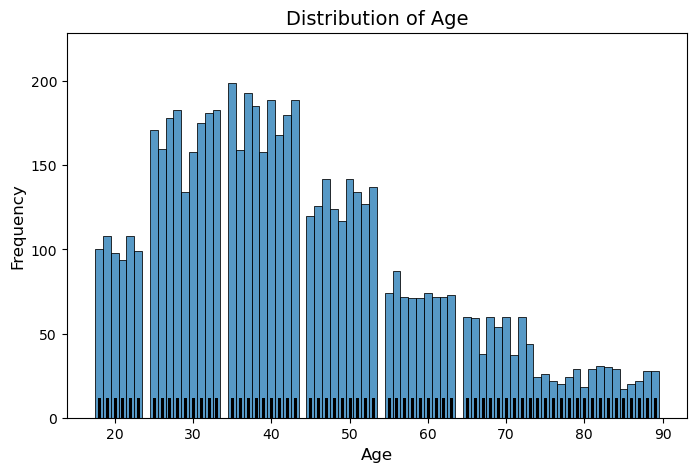

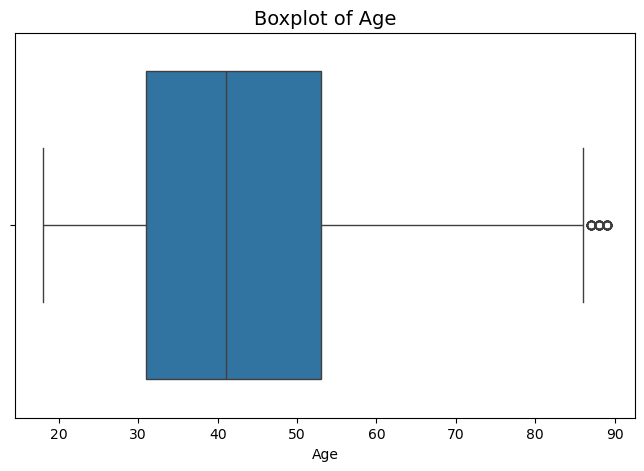

____________________________________________________________________________________________________
Attribute: Work_Experience
____________________________________________________________________________________________________
count    5808.000000
mean        2.671488
std         3.434175
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64


Frequency Distribution for Work_Experience:
__________________________________________________
                 Count  Frequency_Ratio (%)
Work_Experience                            
1.0               1886                 32.5
0.0               1850                 31.9
9.0                382                  6.6
8.0                364                  6.3
2.0                224                  3.9
4.0                205                  3.5
3.0                199                  3.4
6.0                174                  3.0
7.0                159      

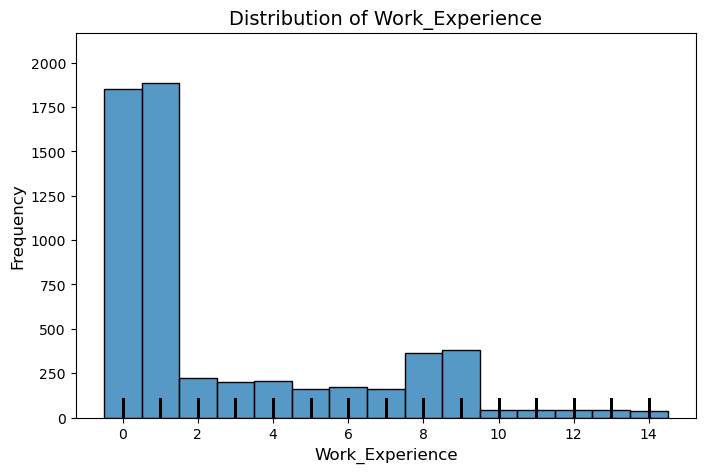

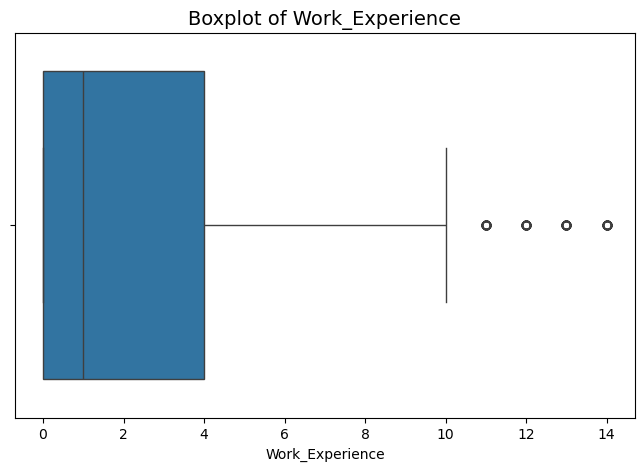

____________________________________________________________________________________________________
Attribute: Family_Size
____________________________________________________________________________________________________
count    6190.000000
mean        2.839742
std         1.531119
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64


Frequency Distribution for Family_Size:
__________________________________________________
             Count  Frequency_Ratio (%)
Family_Size                            
2.0           1885                 30.5
3.0           1205                 19.5
1.0           1195                 19.3
4.0           1103                 17.8
5.0            484                  7.8
6.0            170                  2.7
7.0             76                  1.2
9.0             38                  0.6
8.0             34                  0.5 



Number of Outliers in Family_Size us

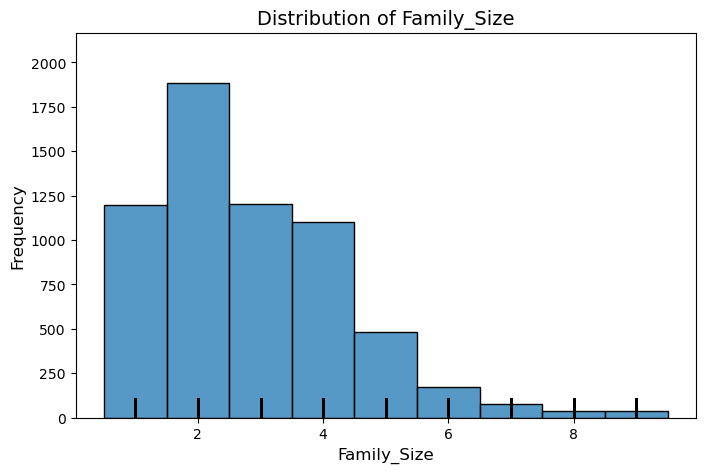

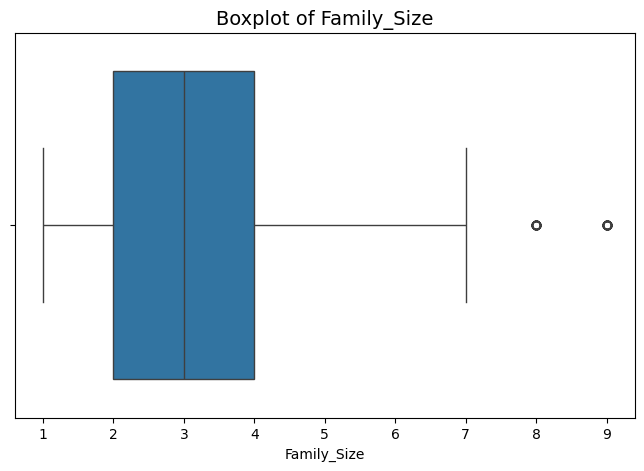

In [19]:
outliers = numerical_eda(numerical_df, target)

In [20]:
# check dict contents
outliers

{'z_score_outliers': {'Age': Index([], dtype='int64'),
  'Work_Experience': Index([  11,   89,  252,  269,  383,  418,  442,  639,  650,  808,  876, 1119,
         1162, 1216, 1305, 1317, 1417, 1420, 1677, 1861, 1896, 2091, 2113, 2229,
         2251, 2266, 2404, 2744, 2930, 3019, 3050, 3057, 3058, 3089, 3311, 3361,
         3409, 3596, 3613, 3700, 3738, 3805, 3854, 4098, 4246, 4248, 4292, 4310,
         4315, 4444, 4509, 4562, 4583, 4592, 4622, 4652, 4808, 4960, 5001, 5263,
         5319, 5448, 5526, 5714, 5814, 5850, 5888, 5924, 5942, 5989, 6033, 6257,
         6272, 6296, 6350, 6366, 6383, 6397, 6406],
        dtype='int64'),
  'Family_Size': Index([  16,  155,  162,  236,  484,  540,  546,  895,  961, 1036, 1074, 1144,
         1209, 1273, 1299, 1339, 1342, 1467, 1488, 1547, 1596, 1796, 2202, 2236,
         2250, 2263, 2280, 2433, 2612, 2755, 2772, 2774, 3033, 3215, 3421, 3443,
         3506, 3544, 3675, 3729, 3799, 3928, 3968, 4223, 4234, 4255, 4286, 4292,
         4381, 4384, 4401

## Examine Correlation

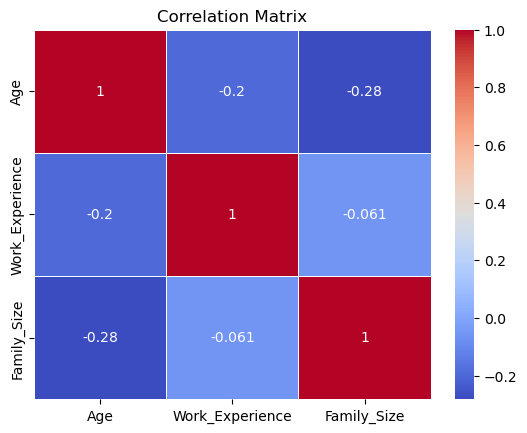

In [21]:
# Correlation
def plot_correlation_matrix(df, annot=True):
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(numerical_df)

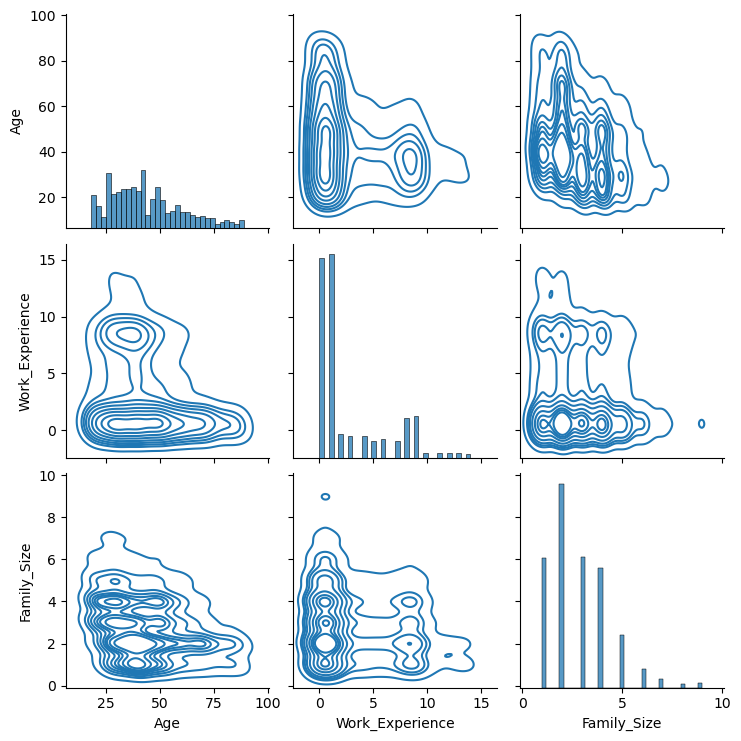

In [22]:
# Pairplots
def plot_pairplot(df):
    sns.pairplot(df, diag_kind="hist", kind="kde")
    plt.show()

plot_pairplot(numerical_df)

In [23]:
# End time
end = time()
elapsed_time = end - start

# Convert elapsed time into hours, minutes, and seconds
hours, rem = divmod(elapsed_time, 3600)
minutes, seconds = divmod(rem, 60)

# Print formatted time
print(f'Script run time: {int(hours):02}:{int(minutes):02}:{int(seconds):02} (hh:mm:ss)')

Script run time: 00:00:09 (hh:mm:ss)


#### Save to html

In [24]:

# Load the notebook
with open('phase2_eda.ipynb') as f:
    notebook = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
html_data, _ = html_exporter.from_notebook_node(notebook)

# Path to the directory you want to create
dir_path = "htmls/"

# Check if the directory exists and create it if it doesn't
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    print(f"Directory '{dir_path}' created.")

# Write the output to an HTML file
with open(dir_path + 'phase2_eda.html', 'w') as f:
    f.write(html_data)